# Importing Dataset

Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Data Preprocessing

Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'D:\\Fruit_Vegetable_Recognition\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'D:\\Fruit_Vegetable_Recognition\\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


Building Model

In [4]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [13]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

Compiling and Training Phase

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 307ms/step - accuracy: 0.0304 - loss: 12.6282 - val_accuracy: 0.0684 - val_loss: 3.4159
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 291ms/step - accuracy: 0.0559 - loss: 3.4774 - val_accuracy: 0.0883 - val_loss: 3.2386
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 370ms/step - accuracy: 0.0623 - loss: 3.3294 - val_accuracy: 0.1311 - val_loss: 3.0059
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 287ms/step - accuracy: 0.0681 - loss: 3.2088 - val_accuracy: 0.1652 - val_loss: 2.9003
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - accuracy: 0.1080 - loss: 3.1265 - val_accuracy: 0.2564 - val_loss: 2.7279
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 344ms/step - accuracy: 0.1410 - loss: 3.0026 - val_accuracy: 0.3020 - val_loss: 2.4935
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 351ms/step - accuracy: 0.1717 - loss: 2.9008 - val_accuracy: 0.3647 - val_loss: 2.2458
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 0.2265 - loss: 2.7196 - val_acc

Evaluating Model

In [ ]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.8804 - loss: 0.4710
Training accuracy: 0.8831460475921631


In [ ]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.8692 - loss: 0.5833
Validation accuracy: 0.8717948794364929


Saving Model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history

{'accuracy': [0.03723916411399841,
  0.03467094525694847,
  0.04975922778248787,
  0.0760834664106369,
  0.10144462436437607,
  0.13033707439899445,
  0.17784911394119263,
  0.21669341623783112,
  0.2532905340194702,
  0.3187800943851471,
  0.36083465814590454,
  0.4105938971042633,
  0.4577849209308624,
  0.48924559354782104,
  0.5165328979492188,
  0.5473515391349792,
  0.5961476564407349,
  0.6372391581535339,
  0.6356340050697327,
  0.6706259846687317,
  0.702407717704773,
  0.6934189200401306,
  0.7274478077888489,
  0.7467094659805298,
  0.7521669268608093,
  0.772391676902771,
  0.7865168452262878,
  0.7813804149627686,
  0.7884430289268494,
  0.810914933681488,
  0.8160513639450073,
  0.8269662857055664],
 'loss': [9.970508575439453,
  3.5764832496643066,
  3.5326008796691895,
  3.3628172874450684,
  3.230847120285034,
  3.0711169242858887,
  2.914034843444824,
  2.7832512855529785,
  2.610415458679199,
  2.3973000049591064,
  2.2274913787841797,
  2.060537338256836,
  1.878124

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Calculating Accuracy of Model Achieved on Validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 87.17948794364929 %


# Accuracy Visualization

Training Visualization

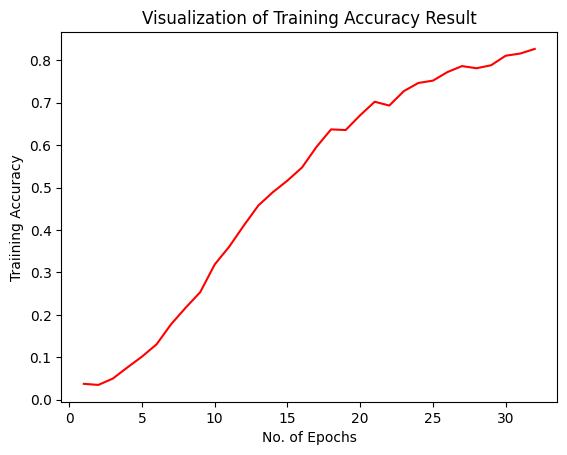

In [ ]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

Validation Accuracy

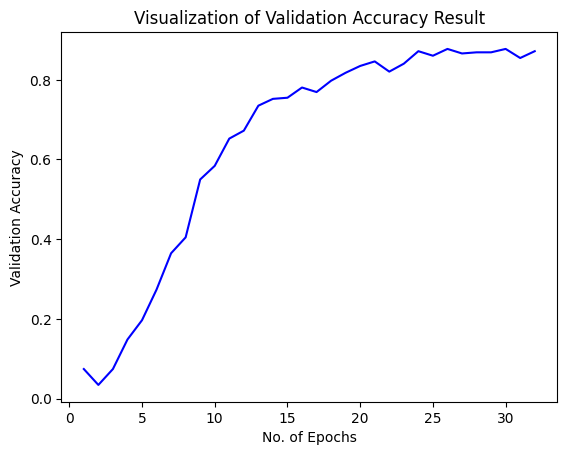

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

Test set Evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'D:\\Fruit_Vegetable_Recognition\\test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8793 - loss: 0.5341
Test accuracy: 0.8746517896652222
